In [89]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# x represents the age
x = [43, 21, 25, 42, 57, 59]
 
# y represents the glucose level
# corresponding to that age
y = [99, 65, 79, 75, 87, 81]
 
# correlation matrix
matrix = np.corrcoef(x, y)
print(matrix)

[[1.        0.5298089]
 [0.5298089 1.       ]]


In [20]:
np.corrcoef(x,x)

array([[nan, nan],
       [nan, nan]])

In [23]:
A=np.ones((4.0,4.0))
print(np.corrcoef(A[:,0], A[:,1]))


TypeError: 'float' object cannot be interpreted as an integer

In [14]:
print(list(A[:,1]))

[1.0, 1.0, 1.0, 1.0]


In [7]:
np.corrcoef(x,y)

array([[nan, nan],
       [nan, nan]])

In [83]:
A = np.array(([1,4],[3,2]))

In [84]:
print(A)

[[1 4]
 [3 2]]


In [85]:
np.corrcoef(A[:,0],A[:,1])[1,1]

0.9999999999999999

In [86]:
number_features=A.shape[1]
ciao = np.zeros((number_features,number_features))

for i in range(number_features):
    for j in range(number_features):
        corr = np.corrcoef(A[:,i], A[:,j])[1,1]
        ciao[i][j]=corr
        print(np.corrcoef(A[:,i], A[:,j])[1,1])
        print(i)
        print(j)
        
print(ciao)

0.9999999999999999
0
0
0.9999999999999999
0
1
0.9999999999999999
1
0
0.9999999999999999
1
1
[[1. 1.]
 [1. 1.]]


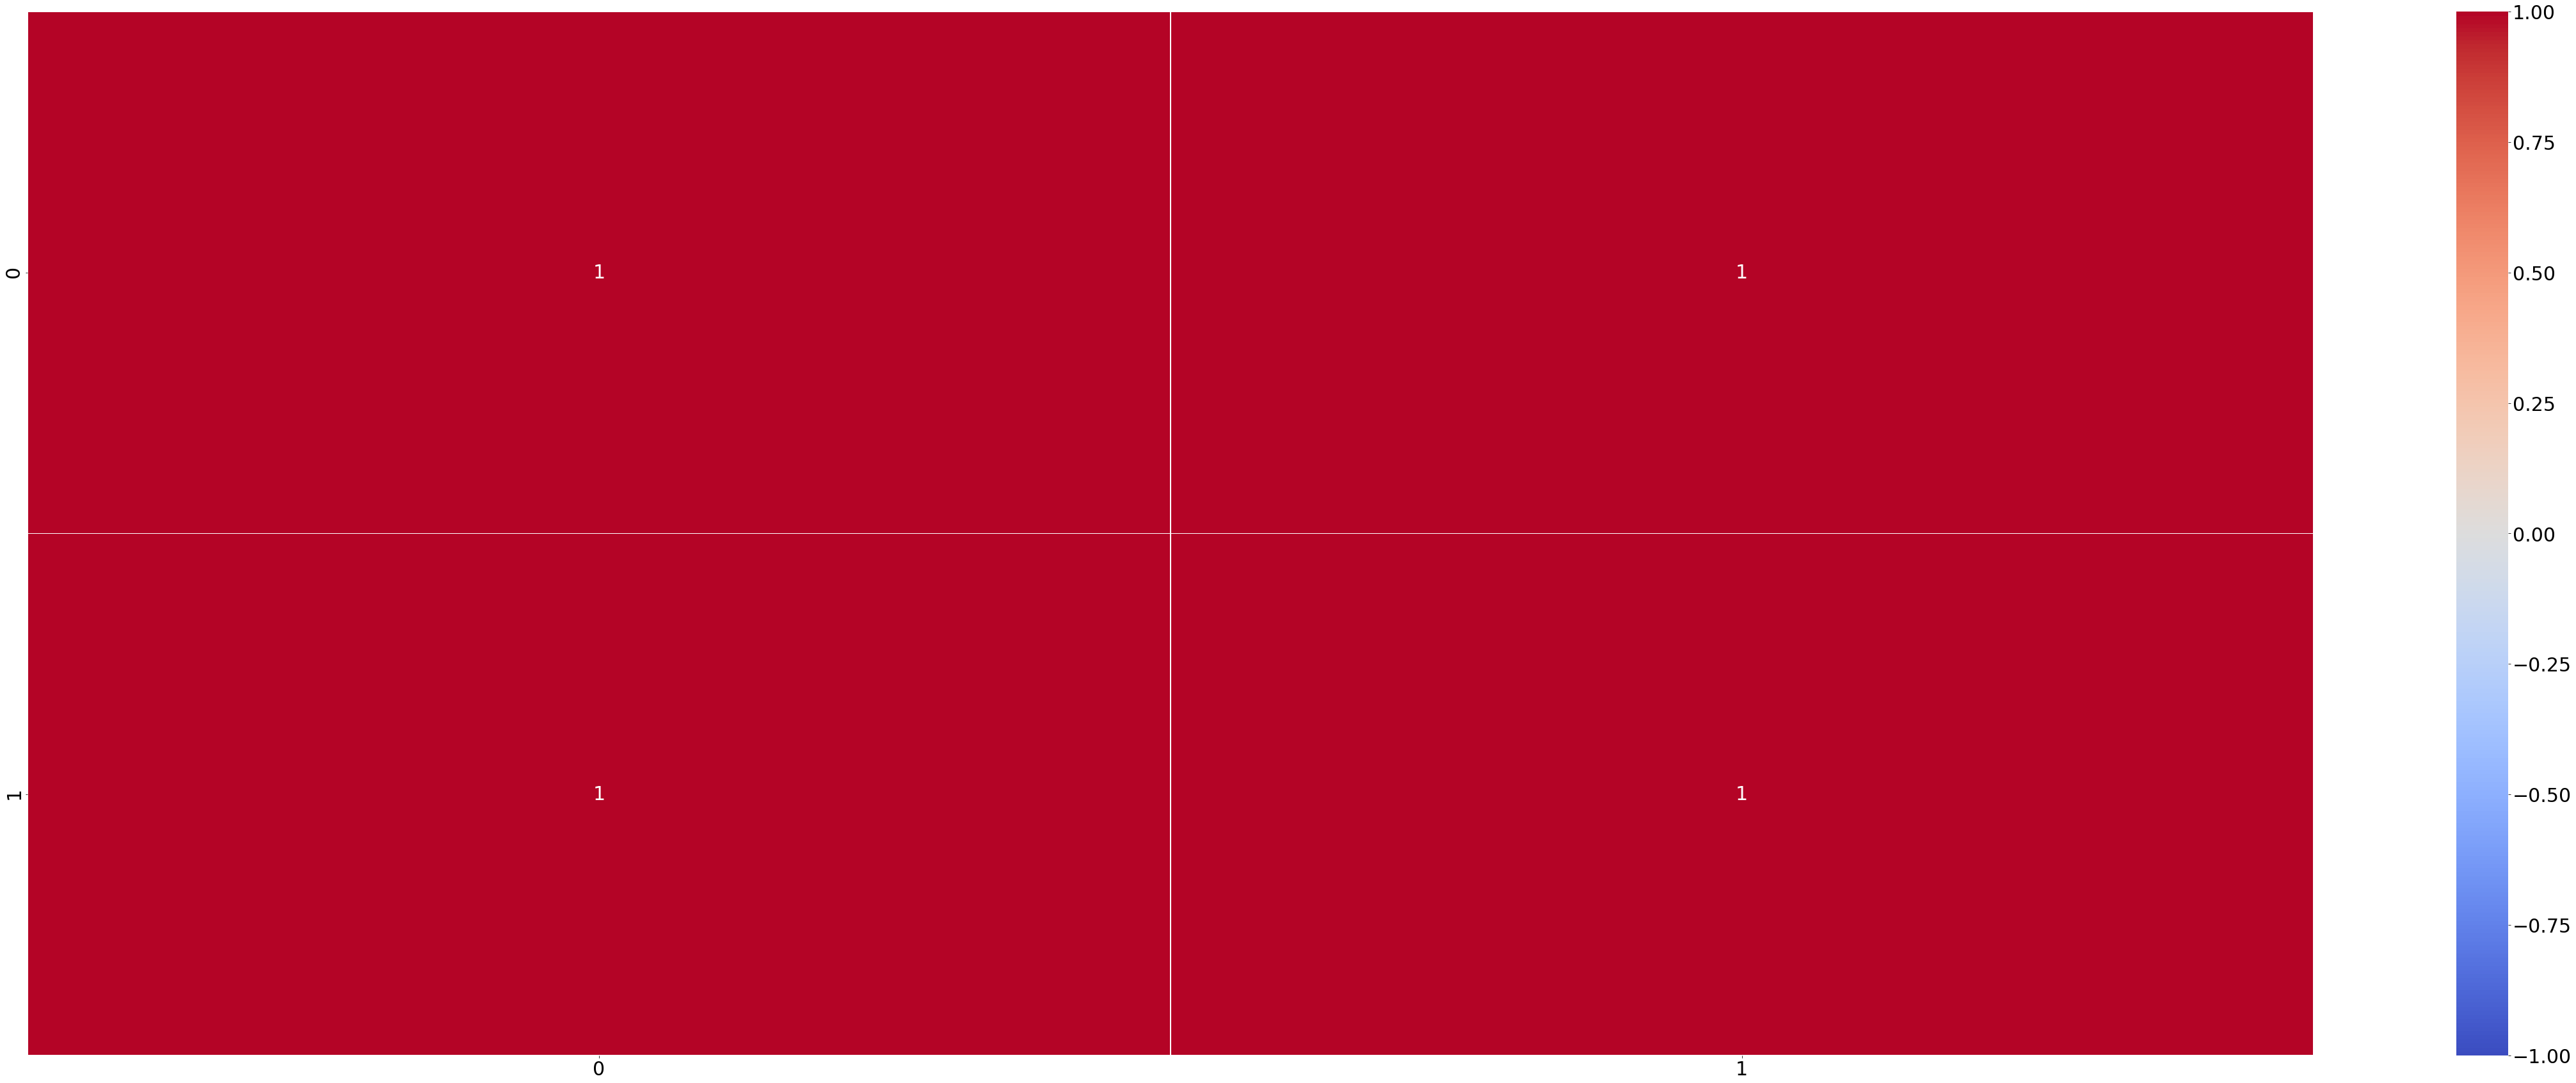

In [90]:
plt.figure(figsize=(80,30))
plt.rc('font',size=30)
sns.heatmap(ciao,vmin = -1, vmax = 1, cmap = 'coolwarm',linewidths = .5, annot=True, annot_kws = {"size":30})
plt.show()

In [53]:
print(Matrix)

[[1. 1.]
 [1. 1.]]


In [ ]:
plt.figure(figsize=(80,30))
plt.rc('font',size=30)
sns.heatmap(data = X_panda.corr().round(2),vmin = -1, vmax = 1, cmap = 'coolwarm',linewidths = .5, annot=True, annot_kws = {"size":30})
plt.show()